# Importing and Browsing Data

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
aviation = pd.read_csv('Aviation_Data.csv')

C:\Users\Jackson\anaconda\anaconda-this one\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [205]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [206]:
aviation.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [207]:
#dropping dupliates
duplicates = aviation[aviation.duplicated()]
print(len(duplicates))
duplicates.head(30)
aviation = aviation.drop_duplicates(subset='Event.Id')

1390


In [208]:
#dropping event ID N/A
aviation.dropna(subset=['Event.Id'], inplace=True)

In [209]:
aviation['Aircraft.Category'].value_counts()

Airplane             27520
Helicopter            3434
Glider                 505
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [210]:
aviation['Make'].value_counts()

Cessna                21925
Piper                 11903
CESSNA                 4914
Beech                  4290
PIPER                  2841
                      ...  
PEKOLA JAMES W            1
Neefjes                   1
Rallison                  1
Fogarty Pitts             1
TAFT, MALCOLM J SR        1
Name: Make, Length: 8202, dtype: int64

# Cleaning Data

In [211]:
#standardizing weather conditions
aviation['Weather.Condition'] = aviation['Weather.Condition'].replace('Unk', 'UNK')

In [212]:
aviation['Engine.Type'] = aviation['Engine.Type'].replace('NONE', 'None')

In [213]:
#standardizing make names
aviation['Make'] = aviation['Make'].replace('PIPER', 'Piper')
aviation['Make'] = aviation['Make'].replace('CESSNA', 'Cessna')

In [214]:
#dropping nans for event date
aviation.dropna(subset=['Event.Date'], inplace=True)

In [215]:
#creating year column
aviation['Year'] = aviation['Event.Date'].astype(str).str[:4]

In [216]:
aviation['Engine.Type'].describe()

count             80927
unique               12
top       Reciprocating
freq              68885
Name: Engine.Type, dtype: object

# Exploring Trends - Engines Count/Types and Injuries

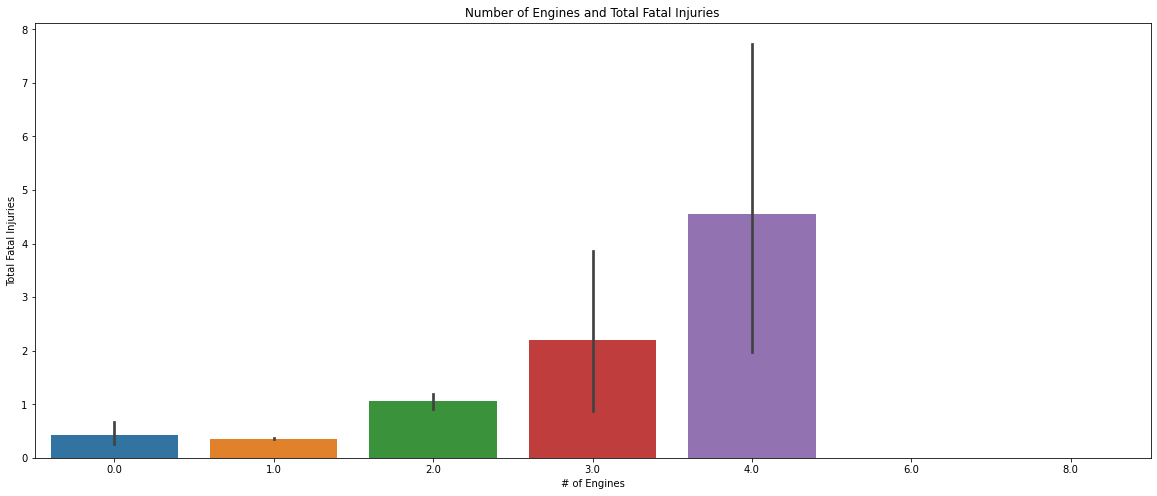

In [217]:
#plot of engine count and fatal injuries
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Number.of.Engines'], y=aviation['Total.Fatal.Injuries'])

ax.set_title('Number of Engines and Total Fatal Injuries')
ax.set_xlabel('# of Engines')
ax.set_ylabel('Total Fatal Injuries');

In [218]:
#sum of injuries for engine count
engine_count = aviation.groupby('Number.of.Engines').sum()
engine_count

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,,,,
0.0,402.0,443.0,476.0,3018.0
1.0,21627.0,13818.0,17592.0,71816.0
2.0,10048.0,3385.0,4416.0,183081.0
3.0,861.0,316.0,1141.0,46148.0
4.0,1651.0,231.0,506.0,37622.0
6.0,0.0,0.0,0.0,0.0
8.0,0.0,21.0,3.0,11.0


In [219]:
#means of injueries for engine count
aviation.groupby('Number.of.Engines').mean()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,,,,
0.0,0.420502,0.436884,0.485714,2.768807
1.0,0.359444,0.232056,0.291925,1.109916
2.0,1.052918,0.361839,0.474227,17.838936
3.0,2.190840,0.784119,2.881313,104.171558
4.0,4.560773,0.634615,1.390110,93.354839
6.0,0.000000,0.000000,0.000000,0.000000
8.0,0.000000,7.000000,1.000000,3.666667


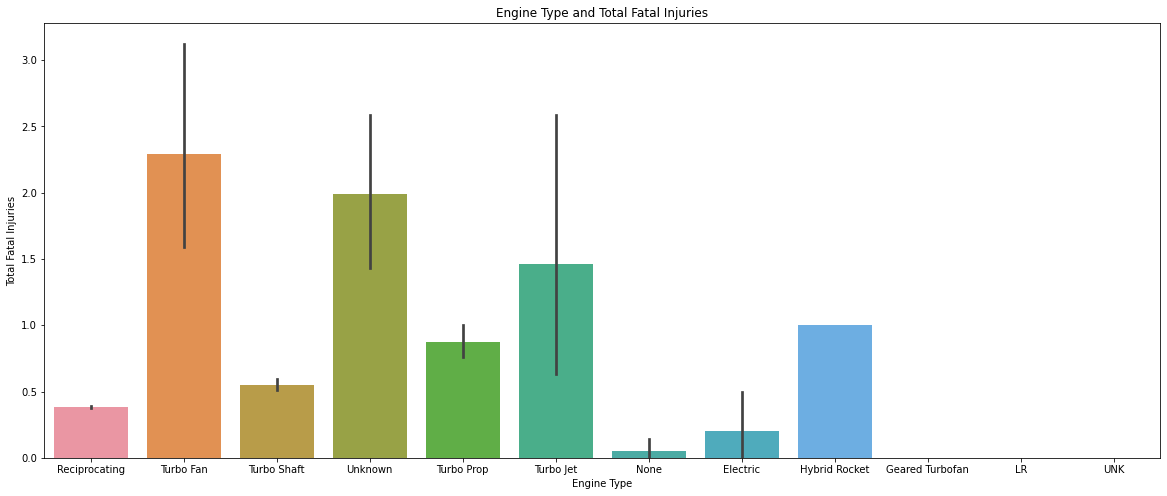

In [220]:
#plot of engine type and total fatal injuries
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Engine.Type'], y=aviation['Total.Fatal.Injuries'])

ax.set_title('Engine Type and Total Fatal Injuries')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Total Fatal Injuries');

In [221]:
engine_count['Total Passengers'] = engine_count['Total.Fatal.Injuries'] + engine_count['Total.Serious.Injuries'] + engine_count['Total.Minor.Injuries'] + engine_count['Total.Uninjured']

In [222]:
engine_count['Ratio Uninjured'] = engine_count['Total.Uninjured'] / engine_count['Total Passengers']
engine_count

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Passengers,Ratio Uninjured
Number.of.Engines,,,,,,
0.0,402.0,443.0,476.0,3018.0,4339.0,0.695552
1.0,21627.0,13818.0,17592.0,71816.0,124853.0,0.575204
2.0,10048.0,3385.0,4416.0,183081.0,200930.0,0.911168
3.0,861.0,316.0,1141.0,46148.0,48466.0,0.952173
4.0,1651.0,231.0,506.0,37622.0,40010.0,0.940315
6.0,0.0,0.0,0.0,0.0,0.0,NaN
8.0,0.0,21.0,3.0,11.0,35.0,0.314286


In [223]:
engine_count['Ratio Uninjured'] = engine_count['Ratio Uninjured']*100 

<ipython-input-224-c8a47c756f99>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value);


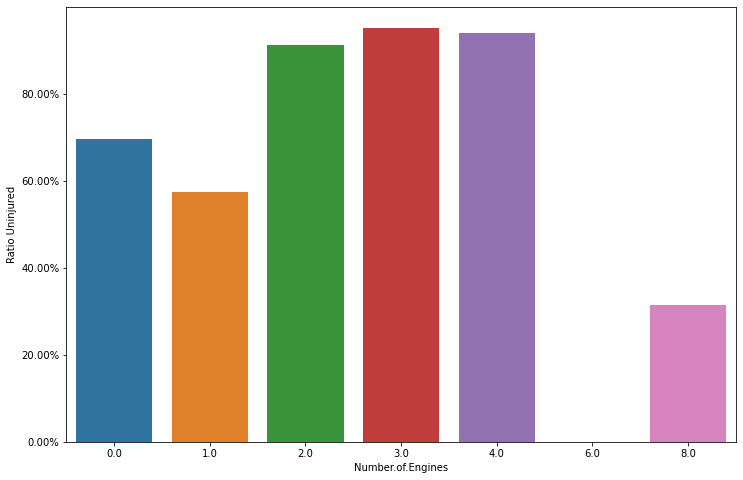

In [224]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=engine_count.index, y=engine_count['Ratio Uninjured'])
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value);

In [225]:
#sums of engine types and total injuries
aviation.groupby('Engine.Type').sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,,
Electric,24.0,2.0,1.0,0.0,7.0
Geared Turbofan,22.0,0.0,0.0,0.0,121.0
Hybrid Rocket,1.0,1.0,0.0,1.0,0.0
LR,16.0,0.0,21.0,3.0,11.0
None,11.0,1.0,12.0,8.0,92.0
Reciprocating,74452.0,23126.0,13366.0,17157.0,72943.0
Turbo Fan,5344.0,4419.0,1812.0,3279.0,194409.0
Turbo Jet,1446.0,841.0,234.0,363.0,32504.0
Turbo Prop,5126.0,2448.0,671.0,885.0,14836.0


In [226]:
#means of engine type and number of injuries
aviation.groupby('Engine.Type').mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,,
Electric,3.000000,0.200000,0.100000,0.000000,0.700000
Geared Turbofan,2.000000,0.000000,0.000000,0.000000,10.083333
Hybrid Rocket,1.000000,1.000000,0.000000,1.000000,0.000000
LR,8.000000,0.000000,10.500000,1.500000,5.500000
None,0.647059,0.047619,0.571429,0.380952,4.380952
Reciprocating,1.088798,0.383732,0.224563,0.285213,1.128520
Turbo Fan,2.337708,2.294393,0.908726,1.675524,83.688765
Turbo Jet,2.139053,1.460069,0.406957,0.640212,50.083205
Turbo Prop,1.572875,0.869936,0.248151,0.323111,4.851537


In [233]:
engine_types = aviation.groupby('Engine.Type').sum()

In [234]:
#creating a total passengers column and then a ratio of total uninjured to total passengers
engine_types['Total Passengers'] = engine_types['Total.Fatal.Injuries'] + engine_types['Total.Serious.Injuries'] + engine_types['Total.Minor.Injuries'] + engine_types['Total.Uninjured']
engine_types['Ratio Uninjured'] = engine_types['Total.Uninjured'] / engine_types['Total Passengers']

In [235]:
engine_types

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Passengers,Ratio Uninjured
Engine.Type,,,,,,,
Electric,24.0,2.0,1.0,0.0,7.0,10.0,0.700000
Geared Turbofan,22.0,0.0,0.0,0.0,121.0,121.0,1.000000
Hybrid Rocket,1.0,1.0,0.0,1.0,0.0,2.0,0.000000
LR,16.0,0.0,21.0,3.0,11.0,35.0,0.314286
None,11.0,1.0,12.0,8.0,92.0,113.0,0.814159
Reciprocating,74452.0,23126.0,13366.0,17157.0,72943.0,126592.0,0.576205
Turbo Fan,5344.0,4419.0,1812.0,3279.0,194409.0,203919.0,0.953364
Turbo Jet,1446.0,841.0,234.0,363.0,32504.0,33942.0,0.957634
Turbo Prop,5126.0,2448.0,671.0,885.0,14836.0,18840.0,0.787473


In [230]:
engine_types['Ratio Uninjured'] = engine_types['Ratio Uninjured']*100 

In [231]:
#making the column into a percentage format
#engine_types['Ratio Uninjured'] = engine_types['Ratio Uninjured']*100 
#engine_types['Ratio Uninjured'] = engine_types['Ratio Uninjured'].map('{:.2%}'.format)

<ipython-input-236-48da2f0f6469>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value);


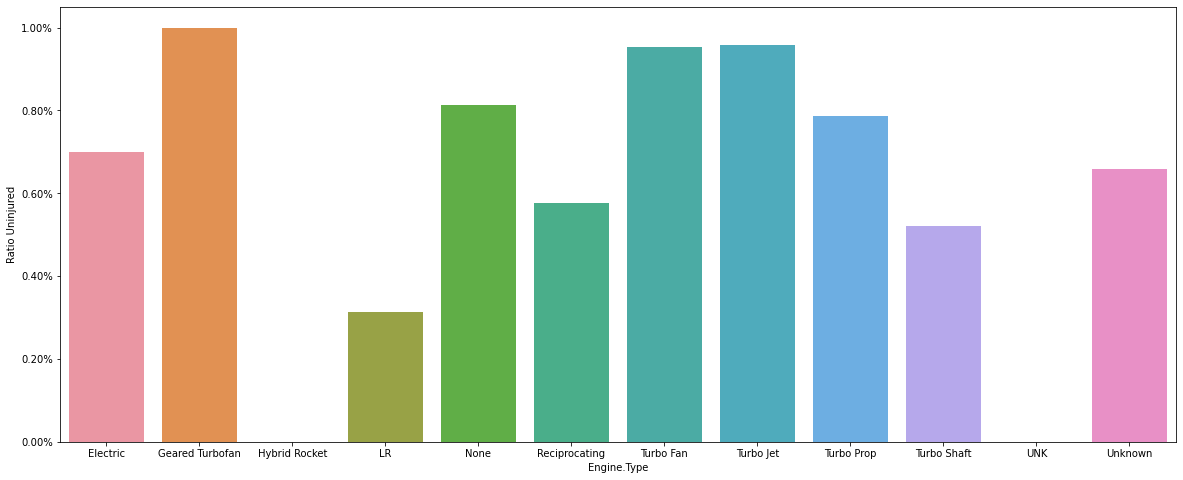

In [236]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=engine_types.index, y=engine_types['Ratio Uninjured'])
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value);

In [237]:
aviation.groupby('Engine.Type').mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,,
Electric,3.000000,0.200000,0.100000,0.000000,0.700000
Geared Turbofan,2.000000,0.000000,0.000000,0.000000,10.083333
Hybrid Rocket,1.000000,1.000000,0.000000,1.000000,0.000000
LR,8.000000,0.000000,10.500000,1.500000,5.500000
None,0.647059,0.047619,0.571429,0.380952,4.380952
Reciprocating,1.088798,0.383732,0.224563,0.285213,1.128520
Turbo Fan,2.337708,2.294393,0.908726,1.675524,83.688765
Turbo Jet,2.139053,1.460069,0.406957,0.640212,50.083205
Turbo Prop,1.572875,0.869936,0.248151,0.323111,4.851537


# Exploring Trends - Engine Count/Types and Aircraft Damage

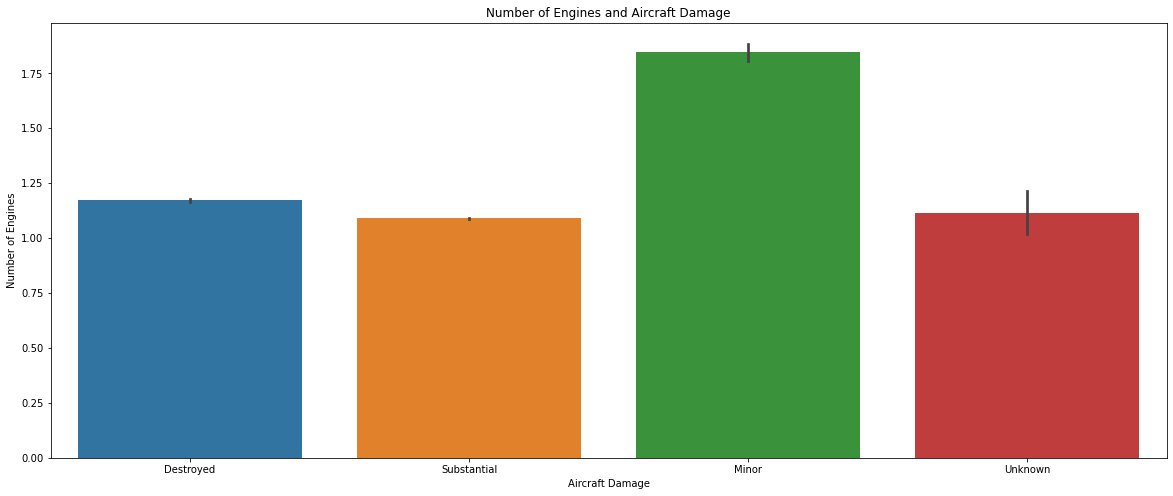

In [238]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Aircraft.damage'], y=aviation['Number.of.Engines'])

ax.set_title('Number of Engines and Aircraft Damage')
ax.set_xlabel('Aircraft Damage')
ax.set_ylabel('Number of Engines');

In [239]:
aviation.groupby('Aircraft.damage').sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Aircraft.damage,,,,,
Destroyed,19650.0,39670.0,6892.0,6015.0,8627.0
Minor,3918.0,278.0,526.0,1773.0,105383.0
Substantial,66512.0,7748.0,12369.0,17634.0,146266.0
Unknown,68.0,56.0,16.0,25.0,478.0


In [240]:
aviation.groupby('Aircraft.damage').mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Aircraft.damage,,,,,
Destroyed,1.170967,2.235685,0.427278,0.377755,0.543125
Minor,1.844633,0.121823,0.227607,0.773898,40.516340
Substantial,1.090307,0.143742,0.227937,0.319532,2.418459
Unknown,1.114754,0.470588,0.134454,0.210084,4.016807


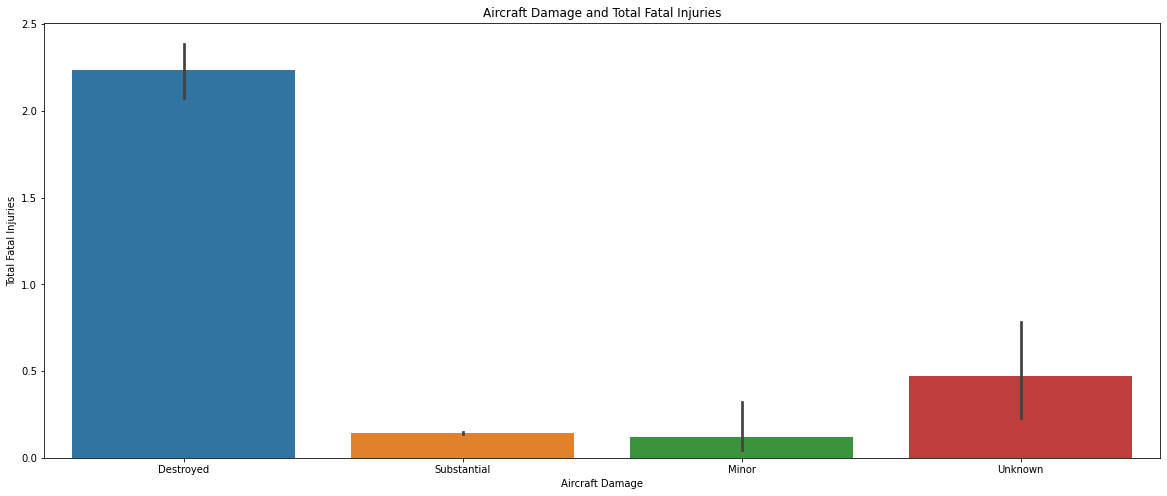

In [241]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Aircraft.damage'], y=aviation['Total.Fatal.Injuries'])

ax.set_title('Aircraft Damage and Total Fatal Injuries')
ax.set_xlabel('Aircraft Damage')
ax.set_ylabel('Total Fatal Injuries');

In [242]:
aviation.groupby(['Aircraft.damage','Number.of.Engines']).mean()

Total.Fatal.Injuries  \
Aircraft.damage Number.of.Engines                         
Destroyed       0.0                            1.936306   
                1.0                            1.209835   
                2.0                            3.244898   
                3.0                           43.111111   
                4.0                           30.185185   
Minor           0.0                            0.063830   
                1.0                            0.107692   
                2.0                            0.204545   
                3.0                            0.023256   
                4.0                            0.000000   
Substantial     0.0                            0.134969   
                1.0                            0.117554   
                2.0                            0.179160   
                3.0                            1.025974   
                4.0                            0.168421   
                6.0                            0.000000   
                8.0                            0.000000   
Unknown         0.0                            0.500000   
                1.0                            0.260000   
                2.0                            0.222222   

                                   Total.Serious.Injuries  \
Aircraft.damage Number.of.Engines                           
Destroyed       0.0                              0.375839   
                1.0                              0.332518   
                2.0                              0.505700   
                3.0                              6.368421   
                4.0                              2.489796   
Minor           0.0                              1.015625   
                1.0                              0.127731   
                2.0                              0.159215   
                3.0                              0.580460   
                4.0                              0.274194   
Substantial     0.0                              0.331343   
                1.0                              0.205748   
                2.0                              0.272653   
                3.0                              0.333333   
                4.0                              0.210526   
                6.0                              0.000000   
                8.0                              4.000000   
Unknown         0.0                              0.000000   
                1.0                              0.280000   
                2.0                              0.000000   

                                   Total.Minor.Injuries  Total.Uninjured  
Aircraft.damage Number.of.Engines                                         
Destroyed       0.0                            0.288591         1.483444  
                1.0                            0.276398         0.254960  
                2.0                            0.546093         0.729201  
                3.0                           13.315789        29.888889  
                4.0                            0.877551         5.958333  
Minor           0.0                            0.920000         6.816667  
                1.0                            0.104274         2.282407  
                2.0                            0.541893        47.590521  
                3.0                            2.086207       112.520833  
                4.0                            1.184000       102.949640  
Substantial     0.0                            0.444940         1.680054  
                1.0                            0.299101         1.267851  
                2.0                            0.379891         8.489107  
                3.0                            2.207792        68.204082  
                4.0                            1.114583        70.800000  
                6.0                            0.000000         0.000000  
                8.0                        

In [243]:
aviation.groupby(['Number.of.Engines','Engine.Type']).mean()

Total.Fatal.Injuries  \
Number.of.Engines Engine.Type                             
0.0               None                         0.000000   
                  Reciprocating                0.500000   
                  Unknown                      0.512821   
1.0               Electric                     0.250000   
                  Hybrid Rocket                1.000000   
                  None                         0.000000   
                  Reciprocating                0.343138   
                  Turbo Fan                    0.840000   
                  Turbo Jet                    0.593023   
                  Turbo Prop                   0.509322   
                  Turbo Shaft                  0.488731   
                  UNK                          0.000000   
                  Unknown                      0.381818   
2.0               Geared Turbofan              0.000000   
                  None                         0.000000   
                  Reciprocating                0.767911   
                  Turbo Fan                    1.562312   
                  Turbo Jet                    1.081921   
                  Turbo Prop                   1.074675   
                  Turbo Shaft                  0.912833   
                  Unknown                      0.555556   
3.0               Reciprocating                0.000000   
                  Turbo Fan                    2.333333   
                  Turbo Jet                    0.094118   
                  Unknown                      0.000000   
4.0               Electric                     0.000000   
                  None                         0.000000   
                  Reciprocating                1.122449   
                  Turbo Fan                    6.153061   
                  Turbo Jet                    6.181818   
                  Turbo Prop                   3.375000   
                  Unknown                      0.000000   
8.0               Electric                     0.000000   
                  LR                           0.000000   

                                   Total.Serious.Injuries  \
Number.of.Engines Engine.Type                               
0.0               None                           0.400000   
                  Reciprocating                  0.000000   
                  Unknown                        0.399038   
1.0               Electric                       0.250000   
                  Hybrid Rocket                  0.000000   
                  None                           0.800000   
                  Reciprocating                  0.223722   
                  Turbo Fan                      0.157895   
                  Turbo Jet                      0.250000   
                  Turbo Prop                     0.214539   
                  Turbo Shaft                    0.397076   
                  UNK                            0.000000   
                  Unknown                        0.333333   
2.0               Geared Turbofan                0.000000   
                  None                           3.000000   
                  Reciprocating                  0.227868   
                  Turbo Fan                      0.853852   
                  Turbo Jet                      0.501393   
                  Turbo Prop                     0.275792   
                  Turbo Shaft                    0.414216   
                  Unknown                        0.315789   
3.0               Reciprocating                  0.400000   
                  Turbo Fan                      0.979592   
                  Turbo Jet                      0.238636   
                  Unknown                        0.000000   
4.0               Electric                       0.000000   
                  None                           0.000000   
                  Reciprocating                  0.255319   
                  Turbo Fan                      0.950000   
                  T

In [244]:
pd.set_option('display.max_columns', None)

In [245]:
aviation.groupby(['Number.of.Engines','Purpose.of.flight']).mean()

Total.Fatal.Injuries  \
Number.of.Engines Purpose.of.flight                                 
0.0               Aerial Application                     0.000000   
                  Aerial Observation                     0.210526   
                  Air Race show                          0.384615   
                  Air Race/show                               NaN   
                  Business                               0.285714   
...                                                           ...   
4.0               Public Aircraft - Federal              2.000000   
                  Unknown                                7.068807   
6.0               Flight Test                            0.000000   
8.0               Business                               0.000000   
                  Flight Test                            0.000000   

                                             Total.Serious.Injuries  \
Number.of.Engines Purpose.of.flight                                   
0.0               Aerial Application                       0.000000   
                  Aerial Observation                       0.884615   
                  Air Race show                            0.153846   
                  Air Race/show                            1.142857   
                  Business                                 0.606061   
...                                                             ...   
4.0               Public Aircraft - Federal                0.000000   
                  Unknown                                  0.759091   
6.0               Flight Test                              0.000000   
8.0               Business                                10.500000   
                  Flight Test                              0.000000   

                                             Total.Minor.Injuries  \
Number.of.Engines Purpose.of.flight                                 
0.0               Aerial Application                     0.000000   
                  Aerial Observation                     1.217391   
                  Air Race show                          0.461538   
                  Air Race/show                               NaN   
                  Business                               1.161290   
...                                                           ...   
4.0               Public Aircraft - Federal              0.000000   
                  Unknown                                1.671233   
6.0               Flight Test                            0.000000   
8.0               Business                               1.500000   
                  Flight Test                            0.000000   

                                             Total.Uninjured  
Number.of.Engines Purpose.of.flight                           
0.0               Aerial Application                1.000000  
                  Aerial Observation                3.629630  
                  Air Race show                     0.923077  
                  Air Race/show                     3.200000  
                  Business                          3.571429  
...                                                      ...  
4.0               Public Aircraft - Federal         3.000000  
                  Unknown                         122.022422  
6.0               Flight Test                       0.000000  
8.0               Business                          5.500000  
                  Flight Test                       0.000000  

[89 rows x 4 columns]

In [246]:
aviation.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Year'],
      dtype='object')

In [260]:
aviation.groupby(['Year']).mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Year,,,,,
1948,1.000000,2.000000,0.000000,0.000000,0.000000
1962,1.000000,4.000000,0.000000,0.000000,0.000000
1974,1.000000,3.000000,NaN,NaN,NaN
1977,1.000000,2.000000,0.000000,0.000000,0.000000
1979,2.000000,1.000000,2.000000,1.000000,22.000000
1981,1.000000,4.000000,0.000000,0.000000,0.000000
1982,1.135608,0.433154,0.204545,0.279466,2.324951
1983,1.155382,0.356266,0.189019,0.296879,3.944064
1984,1.168105,0.348673,0.203600,0.305105,3.318128


In [261]:
aviation.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Year'],
      dtype='object')

In [263]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87951 entries, 0 to 90347
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87951 non-null  object 
 1   Investigation.Type      87951 non-null  object 
 2   Accident.Number         87951 non-null  object 
 3   Event.Date              87951 non-null  object 
 4   Location                87899 non-null  object 
 5   Country                 87729 non-null  object 
 6   Latitude                34212 non-null  object 
 7   Longitude               34203 non-null  object 
 8   Airport.Code            49601 non-null  object 
 9   Airport.Name            52117 non-null  object 
 10  Injury.Severity         86961 non-null  object 
 11  Aircraft.damage         84848 non-null  object 
 12  Aircraft.Category       32181 non-null  object 
 13  Registration.Number     86666 non-null  object 
 14  Make                    87888 non-null

In [264]:
aviation['Report.Status'].value_counts()

Probable Cause                                                                                                                                                                                                                                                                                                                                                                   60867
Foreign                                                                                                                                                                                                                                                                                                                                                                           1974
<br /><br />                                                                                                                                                                                                                                              